# 6.5 Task Machine Learning Part 2
# Project: Data for safer Cities

## Content

1. **Importing Libraries and Data and Data Wrangling**
2. **The Elbow Technique**
3. **K-means Clusting**

## 1. Importing Libraries and Data and Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
# Instant print of plotted graphs
%matplotlib inline

In [3]:
# Creating shortcut
path = r'/home/justem/CF - Data Analyst/Achievement 6/2025-06-07 Data for safer Cities'

### Importing data Set

In [4]:
# Importing dataset clean
df_orig = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_clean.csv'), index_col = False)

In [5]:
# Importing dataset accidents_grouped_coarse from last task
df_agg = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'accidents_grouped_coarse.csv'), index_col = False)

### Changes in the data frame

In [6]:
df_agg.head()

,Unnamed: 0,year,month,weekday,accident_category,accident_scenario,number_of_accidents,mean_distance_km,mean_location_density
0,0,2018,1,1,2,bike_only,1,3.175500,13.000000
1,1,2018,1,1,2,car_only,9,8.748595,4.444444
2,2,2018,1,1,2,ped_car,3,10.412133,9.000000
3,3,2018,1,1,3,bike_car,6,6.771687,6.333333
4,4,2018,1,1,3,bike_ped,1,6.648867,2.000000


In [7]:
# Dropping unwanted columns
df_agg = df_agg.drop(columns=['Unnamed: 0', 'year', 'accident_scenario'])

In [8]:
# Convertting accident_category to severity_score
df_agg['severity_score'] = 4 - df_agg['accident_category']

# Dropping the original column
df_agg = df_agg.drop(columns=['accident_category'])

In [9]:
df_agg.head()

,month,weekday,number_of_accidents,mean_distance_km,mean_location_density,severity_score
0,1,1,1,3.175500,13.000000,2
1,1,1,9,8.748595,4.444444,2
2,1,1,3,10.412133,9.000000,2
3,1,1,6,6.771687,6.333333,1
4,1,1,1,6.648867,2.000000,1


### Standardising Variables

In [10]:
from sklearn.preprocessing import StandardScaler

# Selecting only the numeric columns
numeric_cols = df_agg.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df_agg[numeric_cols]

# Creating the scaler and fit-transform
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Converting back to a data frame for better readability
df_scaled = pd.DataFrame(df_scaled, columns=numeric_cols)

# Checking the result
df_scaled.head()

,month,weekday,number_of_accidents,mean_distance_km,mean_location_density,severity_score
0,-1.648307,-1.558243,-0.598701,-1.537828,0.991632,0.902097
1,-1.648307,-1.558243,-0.158937,0.432493,-0.691500,0.902097
2,-1.648307,-1.558243,-0.488760,1.020623,0.204713,0.902097
3,-1.648307,-1.558243,-0.323849,-0.266426,-0.319900,-0.871789
4,-1.648307,-1.558243,-0.598701,-0.309848,-1.172396,-0.871789


## 2. The Elbow Technique

In [11]:
# Defining the range of cluster numbers
num_cl = range(1, 10)

In [12]:
# Initialising and fit KMeans for each cluster number
kmeans = [KMeans(n_clusters=i, random_state=42, n_init=10) for i in num_cl]
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))]

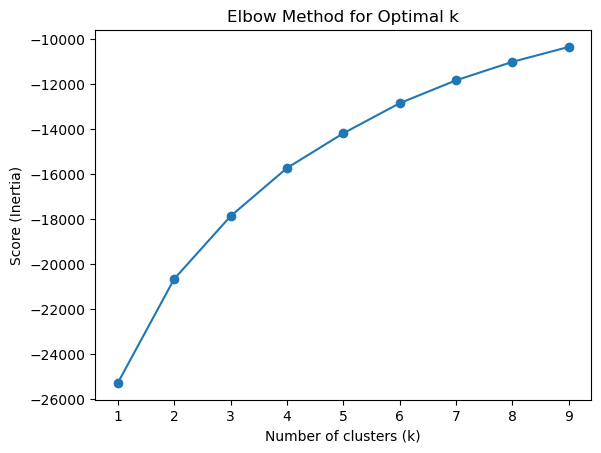

[-25284.00000000001,
 -20663.583169271886,
 -17875.216227794095,
 -15736.768182407211,
 -14191.065026390717,
 -12853.721189119035,
 -11837.946768763972,
 -11015.9867649318,
 -10352.43457531689]

In [13]:
# Plotting the elbow curve using PyLab.
plt.plot(num_cl, score, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score (Inertia)')
plt.show()

score

### Because the plat does not really seem to clearly flatten we run additional analysis steps

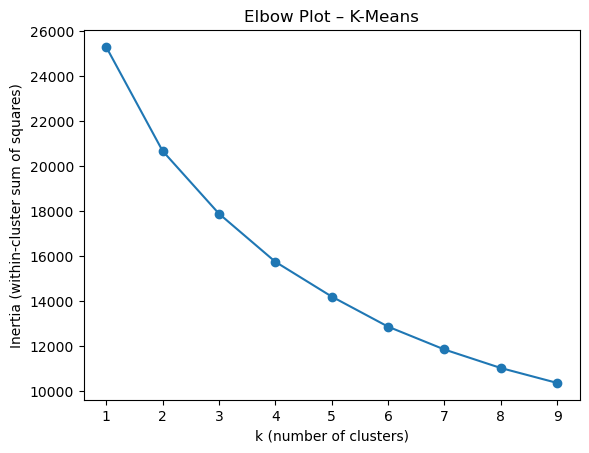

In [14]:
# Re-running elbow using itertia_ (clear plot)
X = df_scaled.values  # scaled numeric matrix from earlier

K_range = range(1, 10)
inertias = []

for k in K_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(K_range, inertias, marker='o')
plt.xticks(K_range)
plt.xlabel('k (number of clusters)')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.title('Elbow Plot – K-Means')
plt.show()#

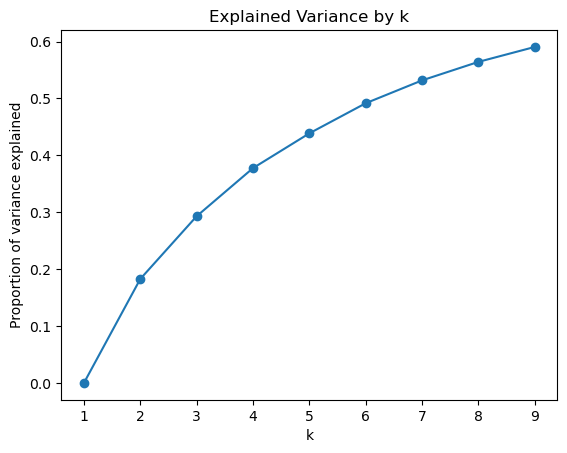

In [15]:
# % variance explained style - to help with visual elbow
inertias = np.array(inertias)
tot = inertias[0]
var_explained = 1 - inertias / tot

plt.plot(K_range, var_explained, marker='o')
plt.xticks(K_range)
plt.xlabel('k')
plt.ylabel('Proportion of variance explained')
plt.title('Explained Variance by k')
plt.show()

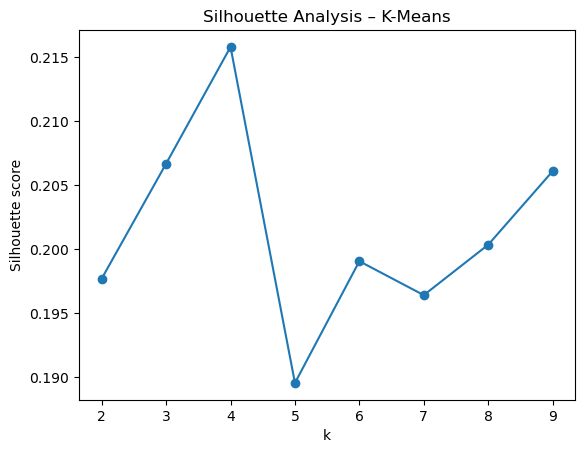

k=2: silhouette=0.198
k=3: silhouette=0.207
k=4: silhouette=0.216
k=5: silhouette=0.190
k=6: silhouette=0.199
k=7: silhouette=0.196
k=8: silhouette=0.200
k=9: silhouette=0.206


In [16]:
# Adding silhouette score
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X)
    sil = silhouette_score(X, labels)
    sil_scores.append(sil)

plt.plot(range(2, 10), sil_scores, marker='o')
plt.xticks(range(2, 10))
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette Analysis – K-Means')
plt.show()

for k, sil in zip(range(2, 10), sil_scores):
    print(f"k={k}: silhouette={sil:.3f}")

I evaluated cluster counts k=1–9 using three diagnostics: (1) inertia (within-cluster sum of squares), (2) proportion of variance explained, and (3) silhouette score. Inertia dropped sharply through k=3, with a smaller gain at k=4 and much flatter improvement thereafter, indicating a soft elbow around k=3–4. The explained variance curve showed the same pattern. Silhouette scores were low overall (data not strongly clusterable) but were highest at low k and remained acceptable at k=3. Based on diminishing returns, stability and interpretability, I selected k=3 for my primary clustering and examined k=4 as a sensitivity check.

## 3. K-means Clustering

In [17]:
# Creating the k-means object
kmeans = KMeans(n_clusters = 3)

In [18]:
# Fitting the k-means object to the data
kmeans.fit(df_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [19]:
df_scaled['clusters'] = kmeans.fit_predict(df_scaled)

In [20]:
df_scaled.head()

,month,weekday,number_of_accidents,mean_distance_km,mean_location_density,severity_score,clusters
0,-1.648307,-1.558243,-0.598701,-1.537828,0.991632,0.902097,2
1,-1.648307,-1.558243,-0.158937,0.432493,-0.691500,0.902097,1
2,-1.648307,-1.558243,-0.488760,1.020623,0.204713,0.902097,1
3,-1.648307,-1.558243,-0.323849,-0.266426,-0.319900,-0.871789,0
4,-1.648307,-1.558243,-0.598701,-0.309848,-1.172396,-0.871789,0


In [21]:
df_scaled['clusters'].value_counts()

clusters
0    2103
1    1639
2     472
Name: count, dtype: int64

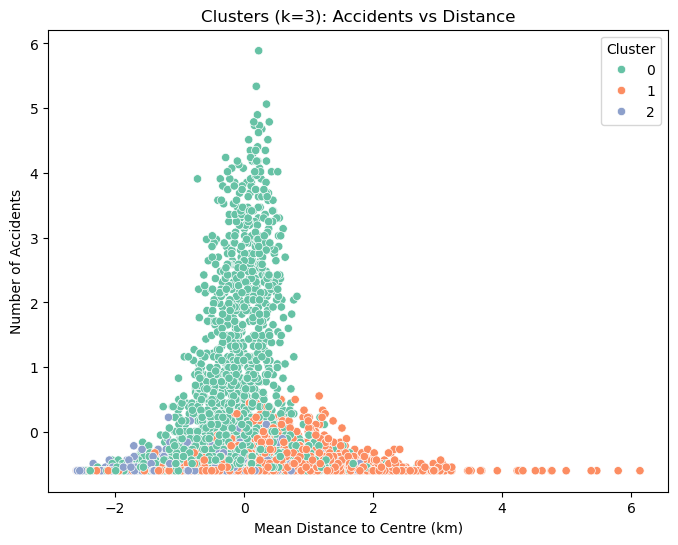

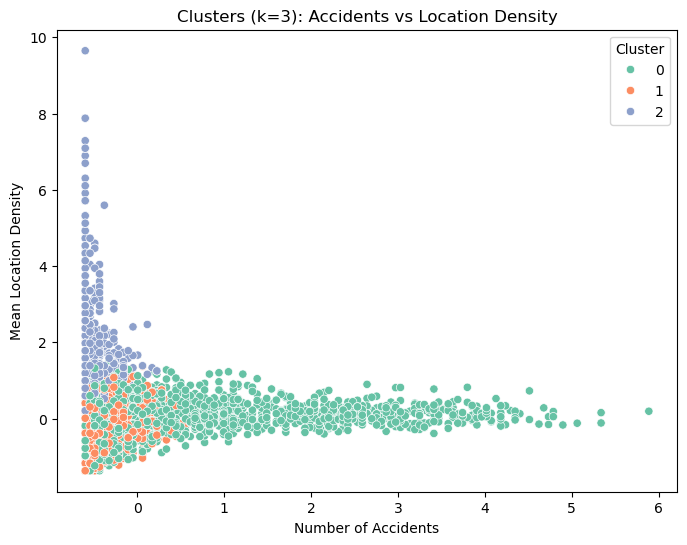

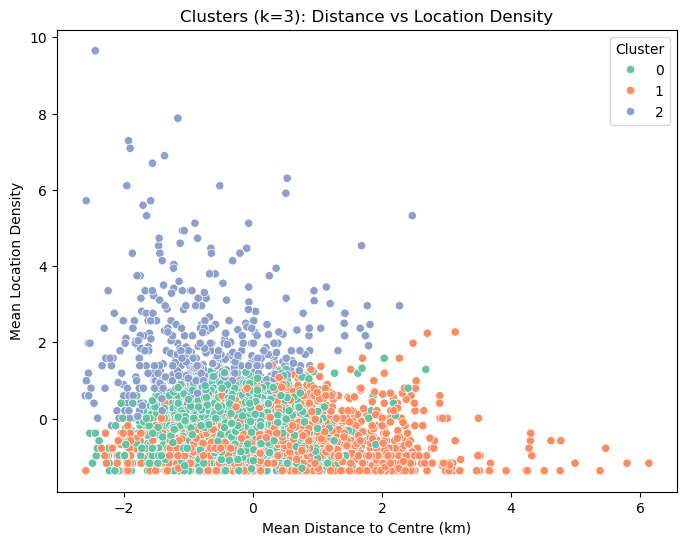

In [22]:
# Scatterplots of different variables
k_choice = 3
cluster_col = f'cluster_k{k_choice}'

# 1. Number of accidents vs. Mean distance
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='mean_distance_km',
    y='number_of_accidents',
    hue='clusters',
    palette='Set2',
    data=df_scaled
)
plt.title(f'Clusters (k={k_choice}): Accidents vs Distance')
plt.xlabel('Mean Distance to Centre (km)')
plt.ylabel('Number of Accidents')
plt.legend(title='Cluster')
plt.show()

# 2. Number of accidents vs. Location density
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='number_of_accidents',
    y='mean_location_density',
    hue='clusters',
    palette='Set2',
    data=df_scaled
)
plt.title(f'Clusters (k={k_choice}): Accidents vs Location Density')
plt.xlabel('Number of Accidents')
plt.ylabel('Mean Location Density')
plt.legend(title='Cluster')
plt.show()

# 3. Distance vs. Location density
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='mean_distance_km',
    y='mean_location_density',
    hue='clusters',
    palette='Set2',
    data=df_scaled
)
plt.title(f'Clusters (k={k_choice}): Distance vs Location Density')
plt.xlabel('Mean Distance to Centre (km)')
plt.ylabel('Mean Location Density')
plt.legend(title='Cluster')
plt.show()

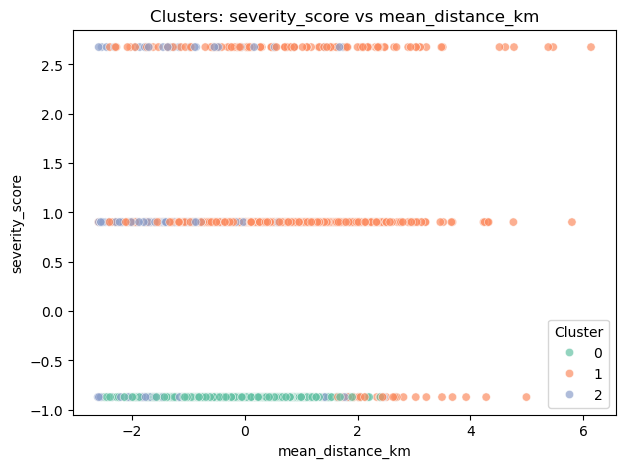

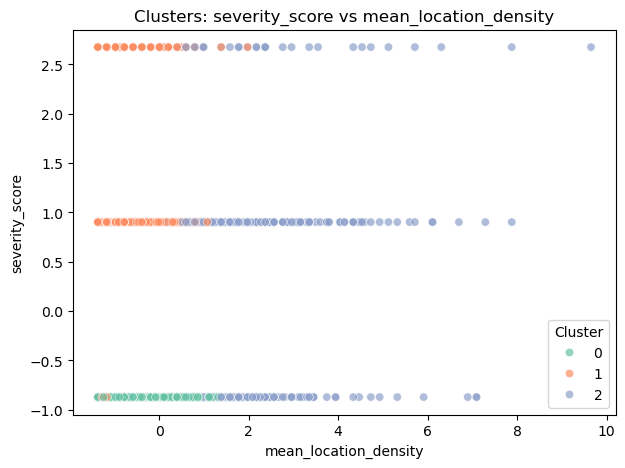

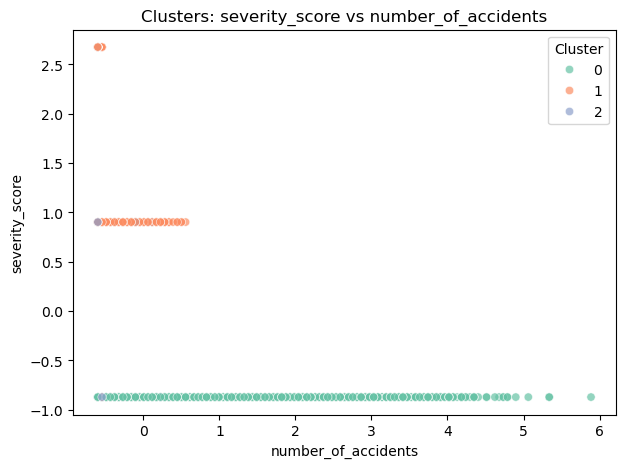

In [23]:
# Additional Plots
# Defining pairs of variables to plot
variable_pairs = [
    ("mean_distance_km", "severity_score"),
    ("mean_location_density", "severity_score"),
    ("number_of_accidents", "severity_score"),
]

# Plotting each pair
for x, y in variable_pairs:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=df_scaled, x=x, y=y, hue="clusters", palette="Set2", alpha=0.7)
    plt.title(f"Clusters: {y} vs {x}")
    plt.legend(title="Cluster")
    plt.show()

#### Calculating descriptive statistics for clustering using groupby() and discuss findings

**Accidents vs Distance**  
Makes sense: The city centre is likely denser in traffic and population, leading to more accidents.

**Accidents vs Location Density**  
Reasonable: Areas with low location density still show accidents but clusters might reflect difference in spatial concentration.

**Distance vs Location Density**  
Mixed: Clusters here seem more dispersed and less defined. Might not add much value without additional context like time of day or rad type.

**Severity Score vs Mean Distance**  
Not very helpful: Clusters don't provide clear separation here.

**Severity Score vs Location Density**  
Only somewhat useful: Might hint at severity increasing with density but clustering is weak.

**Severity Score vs Number of Accidents**  
Limited value: Clusters do not strongly explain variation in severity.  

##### Clusters seem most meaningful in the context of distance to center and number of accidents

In [24]:
df_scaled.groupby('clusters').agg({'month':['mean', 'median'],
                                   'weekday':['mean', 'median'],
                                   'number_of_accidents':['mean', 'median'],
                                   'mean_distance_km':['mean', 'median'],
                                   'mean_location_density':['mean', 'median'],
                                   'severity_score':['mean', 'median']})

month             weekday           number_of_accidents  \
              mean    median      mean    median                mean   
clusters                                                               
0        -0.001283  0.121441 -0.006417 -0.021036            0.439622   
1        -0.007052  0.121441  0.029610 -0.021036           -0.425438   
2         0.030204  0.121441 -0.074230 -0.021036           -0.481423   

                   mean_distance_km           mean_location_density            \
            median             mean    median                  mean    median   
clusters                                                                        
0        -0.158937        -0.164020 -0.116653             -0.100891 -0.051493   
1        -0.488760         0.438369  0.366375             -0.422691 -0.483841   
2        -0.543731        -0.791427 -0.860322              1.917297  1.581822   

         severity_score            
                   mean    median  
clusters                           
0             -0.871789 -0.871789  
1              0.994093  0.902097  
2              0.432318  0.902097

Cluster 0 represents high-accident, low-severity areas close to the center, likely busy zones with frequent but less severe accidents.
Cluster 1 seems like a transitional area, close to the center with moderate accident count and medium severity. Might include major intersections or mixed residential/commercial zones.
Cluster 2 includes outskirts or suburban areas with lower density and slightly higher accident severity, though still moderate accident frequency.

#### Propose what these results could be useful for in future steps of an analytics pipeline.

**Feature Engineering:** Cluster labels and interactions (e.g., severity × density) can improve predictive models.

**Outlier Analysis:** High-severity, low-density cases can be explored further for specific risk factors.

**Geospatial Mapping:** Visualizing clusters across Berlin can reveal spatial trends and inform local interventions.

**Supervised Modeling:** The clusters enable training of models to predict accident severity or likelihood.

**Temporal Analysis:** Using month and weekday to study seasonal or weekly changes in cluster behavior.

**Data Enrichment:** Identifying gaps for adding data like weather, road type, or traffic volume.

Saving the Data Frame with the Clusters

In [25]:
df_scaled.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_scaled_clusters.csv'))